<Figure size 720x720 with 0 Axes>

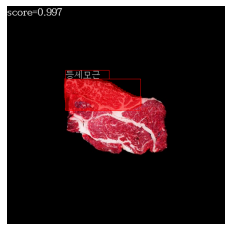

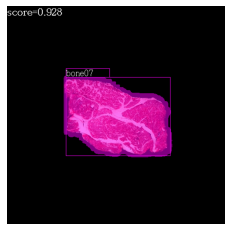

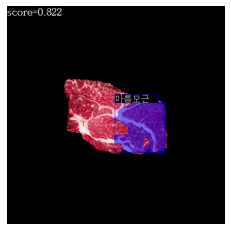

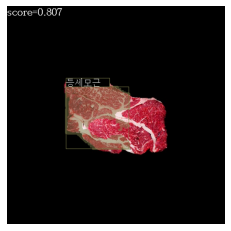

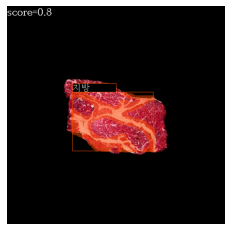

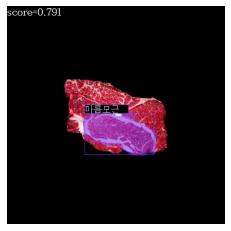

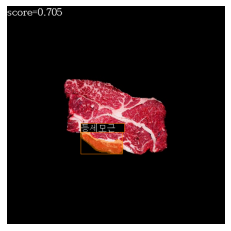

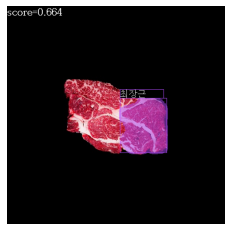

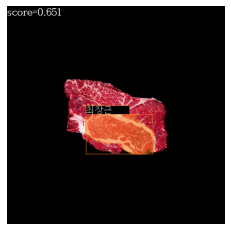

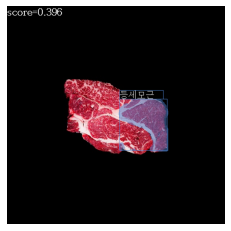

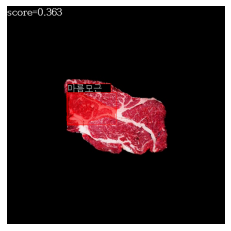

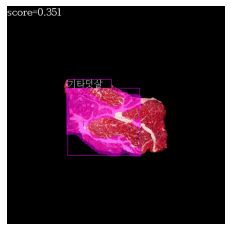

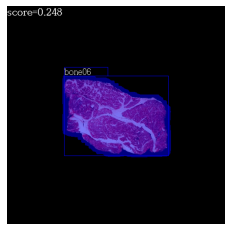

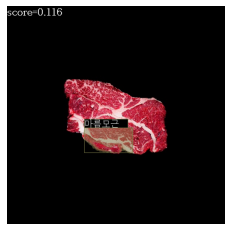

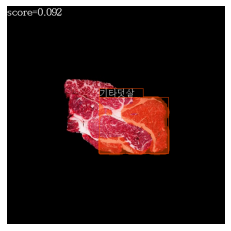

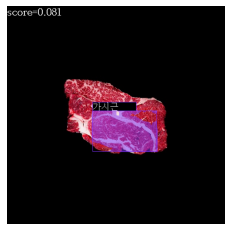

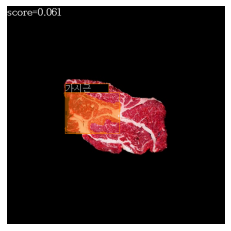

In [116]:
categories=[{'id': 1,
  'name': '가시근',
  'supercategory': 'mucle',
  'color': '040439',
  'metadata': 'korean_beef'},
 {'id': 2,
  'name': '반가시근',
  'supercategory': 'mucle',
  'color': 'ba0e79',
  'metadata': 'korean_beef'},
 {'id': 3,
  'name': '널판근',
  'supercategory': 'mucle',
  'color': 'a6c2d0',
  'metadata': 'korean_beef'},
 {'id': 4,
  'name': '마름모근',
  'supercategory': 'mucle',
  'color': '542bb5',
  'metadata': 'korean_beef'},
 {'id': 5,
  'name': '등세모근',
  'supercategory': 'mucle',
  'color': '85a757',
  'metadata': 'korean_beef'},
 {'id': 6,
  'name': '배쪽톱니근',
  'supercategory': 'mucle',
  'color': '3b0411',
  'metadata': 'korean_beef'},
 {'id': 7,
  'name': '인대',
  'supercategory': 'mucle',
  'color': '628b89',
  'metadata': 'korean_beef'},
 {'id': 8,
  'name': '지방',
  'supercategory': 'mucle',
  'color': '68ab5b',
  'metadata': 'korean_beef'},
 {'id': 9,
  'name': '기타덧살',
  'supercategory': 'mucle',
  'color': 'd0534a',
  'metadata': 'korean_beef'},
 {'id': 10,
  'name': '최장근',
  'supercategory': 'mucle',
  'color': '609899',
  'metadata': 'korean_beef'},
{'id': 11,
  'name': 'bone01',
  'supercategory': 'bone',
  'color': '040439',
  'metadata': 'korean_beef'},
 {'id': 12,
  'name': 'bone02',
  'supercategory': 'bone',
  'color': 'ba0e79',
  'metadata': 'korean_beef'},
 {'id': 13,
  'name': 'bone03',
  'supercategory': 'bone',
  'color': 'a6c2d0',
  'metadata': 'korean_beef'},
 {'id': 14,
  'name': 'bone04',
  'supercategory': 'bone',
  'color': '542bb5',
  'metadata': 'korean_beef'},
 {'id': 15,
  'name': 'bone05',
  'supercategory': 'bone',
  'color': '85a757',
  'metadata': 'korean_beef'},
 {'id': 16,
  'name': 'bone06',
  'supercategory': 'bone',
  'color': '3b0411',
  'metadata': 'korean_beef'},
 {'id': 17,
  'name': 'bone07',
  'supercategory': 'bone',
  'color': '628b89',
  'metadata': 'korean_beef'},
 {'id': 18,
  'name': 'bone08',
  'supercategory': 'bone',
  'color': '68ab5b',
  'metadata': 'korean_beef'},
 {'id': 19,
  'name': 'bone09',
  'supercategory': 'bone',
  'color': 'd0534a',
  'metadata': 'korean_beef'},
 {'id': 20,
  'name': 'bone10',
  'supercategory': 'bone',
  'color': '609899',
  'metadata': 'korean_beef'},
  {'id': 21,
  'name': 'bone11',
  'supercategory': 'bone',
  'color': '68ab5b',
  'metadata': 'korean_beef'},
 {'id': 22,
  'name': 'bone12',
  'supercategory': 'bone',
  'color': 'd0534a',
  'metadata': 'korean_beef'},
 {'id': 23,
  'name': 'bone13',
  'supercategory': 'bone',
  'color': '609899',
  'metadata': 'korean_beef'}]
from PIL import ImageFont, ImageDraw, Image
num_classes = 1+23
import json
import torch
import numpy
import cv2
from PIL import Image    
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

from torchvision.transforms import ToTensor, ToPILImage
def get_instance_segmentation_model(num_classes):
    # COCO 에서 미리 학습된 인스턴스 분할 모델을 읽어옵니다
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # 분류를 위한 입력 특징 차원을 얻습니다
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # 미리 학습된 헤더를 새로운 것으로 바꿉니다
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # 마스크 분류기를 위한 입력 특징들의 차원을 얻습니다
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # 마스크 예측기를 새로운 것으로 바꿉니다
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
mask_colors=[[1,1,0],[1,0,1],[0,0,1],[0,1,0],[1,0,0],[0,1,1],[1,0.5,0],[0.7,0.3,1],[1,0.5,0.1],[0.3,0.5,0.8]]
mask_colors=[[1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255],\
           [1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255],\
            [1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255],\
           [1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255],[1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255],\
           [1*255,0,0],[1*255,0,1*255],[0,0,1*255],[0.5*255,0.5*255,0.3*255],[1*255,0.3*255,0],[0.5*255,0.2*255,1*255],\
             [1*255,0.5*255,0],[0.7*255,0.3*255,1*255],[1*255,0.5*255,0.1*255],[0.3*255,0.5*255,0.8*255]]     

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
%matplotlib inline
from PIL import ImageFont, ImageDraw, Image
num_classes = 1+23
from torchvision.transforms import ToTensor, ToPILImage
# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# print(model)
# move model to the right device
model.to(device)
model.load_state_dict(torch.load('D:/KJE_Airiss/cow_data_for_AI/all_dataset_rm_bg_cow_deform_no_rotate_with_json3_new_correct_23class_flip(500x500)/save_model/epoch_all_cow18.pt')
)
model.eval()
cow_folder='20220615_002145997227_cow'

with open('D:/KJE_Airiss/cow_data_for_AI/new_cow_data/coco/'+cow_folder+'/json/23class_json.json',"r") as pc_train_json:  # pc : poice
        pc_valid_python= json.load(pc_train_json)
imgs_vals=[]    
for kk in range(len(pc_valid_python['images'])):
    imgs_vals.append(pc_valid_python['images'][kk]['file_name'])
    

root='D:/KJE_Airiss/cow_data_for_AI/new_cow_data/coco/'+cow_folder+'/result_edge_e/'


# file_list=os.listdir('D:/KJE_Airiss/cow_data_for_AI/all_dataset_rm_bg_cow_deform_no_rotate_with_json3_new_correct_23class_flip(500x500)/valid')
# file_list=os.listdir('D:/KJE_Airiss/cow_data_for_AI/new_cow_data/20220621_002147635649 Left_cow04_cow_2_1_L/result_edge_e/')
file_list=os.listdir(root)
# pick one image from the test set
# img, annot_origin = dataset_test[25]
# img=cv2.imread('D:/KJE_Airiss/cow_data_for_AI/new_cow_data/20220621_002147635649 Left/bg_rm_resize_img2/8-2.jpg')
new_jj=1
# for jj in file_list:
jj=file_list[2]    
# for jj in file_list[20:len(file_list)]:    
# jj=file_list[83]
# for jj in file_list[1]:
#     img=cv2.imread('D:/KJE_Airiss/cow_data_for_AI/all_dataset_rm_bg_cow_deform_no_rotate_with_json3_new_correct_23class_flip(500x500)/valid/'+jj)
img=cv2.imread(root+jj)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img  = cv2.resize(img , (500, 300), interpolation=cv2.INTER_CUBIC)
tf_toTensor = ToTensor() 
img = tf_toTensor(img) # PIL to Tensor

# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])
img1=img.mul(255).int().byte().cpu().numpy()

img1=img1.transpose(1, 2,0 )



# plt.figure(2,figsize=(10,10))
# plt.imshow(img1)
h,w,c=img1.shape 


#     plt.figure(new_jj,figsize=(20,120))
plt.figure(new_jj,figsize=(10,10))
# fig,ax=plt.subplots()
# ax.imshow(cv2.rectangle(all_mask[1][0],all_mask[3][0],(0,255,0),3), interpolation='none')
shapes = np.zeros((h,w,c), np.uint8)
pred_mask=prediction[0]['masks'].cpu().numpy()

pred_label=prediction[0]['labels'].cpu().numpy()
pred_box=prediction[0]['boxes'].int().cpu().numpy()
pred_score=prediction[0]['scores'].cpu().numpy()
pred_label[pred_score>0.5]
AA=0
for ii in range(len(pred_label)):
    plt.figure()
# for ii in range(25,50):
#     image2=[]  
#     plt.imshow(all_mask[1][ii])
#     img_rect=cv2.rectangle(all_mask[1][ii],all_mask[3][ii],(0,255,0),3)
#     ax.imshow(cv2.rectangle(all_mask[1][0],all_mask[3][0],(0,255,0),3) )
#     tmp=cv2.rectangle(all_mask[1][ii],all_mask[3][ii],(0,255,0),3) 
# #     img=cv2.imread(filename)
# #     h,w,c=img.shape
# #     mask =  np.zeros((h,w,c), np.uint8)

#     tmp=cv2.rectangle(all_mask[1][ii],all_mask[3][ii],(0,255,0),3) 

#         plt.subplot(20,3,AA+1)
    pred_mask1=prediction[0]['masks'][ii, 0].mul(255).byte().cpu().numpy()
    pred_mask2=shapes
    pred_mask2[:,:,0]=pred_mask1
    pred_mask2[:,:,1]=pred_mask1
    pred_mask2[:,:,2]=pred_mask1
    find_idx_pixels_1=[]
    find_idx_pixels_2=[]
    out = img1.copy()
    for i in range(pred_mask2.shape[0]):
        for j in range(pred_mask2.shape[1]):
            if shapes[i][j][0]>0 or  shapes[i][j][1]>0 or shapes[i][j][2]>0:
                find_idx_pixels_1.append([i])
                find_idx_pixels_2.append([j])
    alpha = 0.5

    mask1 = pred_mask2.astype(bool)

#     if ii==0:
    pred_mask2[find_idx_pixels_1,find_idx_pixels_2]= mask_colors[ii]
    out[mask1] = cv2.addWeighted(img1, alpha, pred_mask2, 1 - alpha, 0)[mask1]
#         img_rect=cv2.rectangle(out,(pred_box[ii][0],pred_box[ii][1]),(pred_box[ii][2],pred_box[ii][3]),(0,255,0),3)

    img_rect=cv2.rectangle(out,(int(pred_box[ii][0]),int(pred_box[ii][1])),(int(pred_box[ii][2]),int(pred_box[ii][3])),mask_colors[ii],1)
    img_rect=cv2.rectangle(img_rect,(pred_box[ii][0],pred_box[ii][1]-20),(pred_box[ii][0]+100,pred_box[ii][1]),(0,0,0),-1)
    img_rect=cv2.rectangle(img_rect,(pred_box[ii][0],pred_box[ii][1]-20),(pred_box[ii][0]+100,pred_box[ii][1]),mask_colors[ii],1)
    image2 = Image.fromarray(img_rect)
    draw = ImageDraw.Draw(image2)
    draw.text((pred_box[ii][0],pred_box[ii][1]-20),categories[pred_label[ii]-1]['name'], font=ImageFont.truetype("./batang.ttc", 20), fill=(255,255,255))
    draw.text((0,0),'score=' + str(np.round(pred_score[ii],3)), font=ImageFont.truetype("./batang.ttc", 25), fill=(255,255,255))
    plt.imshow(image2)
    plt.axis('off')
#     plt.savefig('D:/KJE_Airiss/cow_data_for_AI/new_cow_data/coco/'+cow_folder+'/Prediction/'+jj[:-4]+'('+str(AA+1)+')'+'.jpg', bbox_inches='tight')
#         plt.savefig('D:/KJE_Airiss/cow_data_for_AI/all_dataset_rm_bg_cow_deform_no_rotate_with_json3_new_correct_23class_flip(500x500)/result/predict_img_fliptrain_epoch5/'+jj, bbox_inches='tight')
    AA=AA+1
new_jj=new_jj+1    
plt.show()